In [ ]:
!pip install diffusers
!pip install transformers
!pip install torch
!pip install torchvision
!pip install tqdm
!pip install tensorboard
!pip install accelerate

# Feature Extraction
## Extract the Vector Representation of the input text

In [ ]:
from transformers import BartTokenizer, BartModel

tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
model = BartModel.from_pretrained('facebook/bart-large')

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
print (inputs)
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

# 행렬 차원(shape)은 (batch_size, seq_len, embedding_dim)임
print(last_hidden_states.shape, '\n')
print(last_hidden_states)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

{'input_ids': tensor([[    0, 31414,     6,   127,  2335,    16, 11962,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
torch.Size([1, 8, 1024]) 

tensor([[[ 0.5512,  0.8389, -1.4707,  ...,  1.3124, -0.2047,  0.2392],
         [ 0.5512,  0.8389, -1.4707,  ...,  1.3124, -0.2047,  0.2392],
         [ 0.9143,  0.9399, -1.2426,  ...,  0.9184, -0.1838, -0.9975],
         ...,
         [ 0.2561,  0.2253,  0.4470,  ...,  0.3447,  0.0087,  1.5508],
         [ 0.2077, -1.3086, -1.4295,  ..., -0.2998,  0.1828,  0.4700],
         [-0.4893,  2.5148, -1.5513,  ...,  0.5783,  1.0961,  0.1736]]],
       grad_fn=<NativeLayerNormBackward0>)


## Compare two text

In [ ]:
# 런타임 20초
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# 토크나이저 미 모델 초기화
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-mnli")
model = AutoModelForSequenceClassification.from_pretrained("facebook/bart-large-mnli")

# sentence 쌍(pairs)
sentence1 = ''' Let me start by saying this is an awesome case! The cover for the screen and molding for the body of the phone are great. I've dropped it a few times and it is really sturdy. It fits in to all my holders in my cars fully protects my phone. My only problem was the color I PICKED! The gold looked good in the picture on my phone, however when I got the case it was more vanilla than gold. I'll probably order another one in black for me and one for my niece. Great case! '''
sentence2 = '''While this product is absolutely awesome when installed, it looks and feels great, I have to admit it is a little bit hard to get apart initially! Had to have my husband take it apart for me! Not easy for those with tender hands or fingers! That being said, it really is a wonderful product! The glass goes on flawlessly without bubbles and the phone is totally encased for protection.'''

# 입력 토큰화 및 포맷
inputs = tokenizer(sentence1, sentence2, return_tensors='pt')
# 모델 출력 구하기
outputs = model(**inputs)

# 예측된 레이블 구하기
predicted_label = torch.argmax(outputs.logits[0]).item()  # 0: contradiction
predicted_class = model.config.id2label[predicted_label]

print(f"The predicted class for the first pair is: {predicted_class}")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

The predicted class for the first pair is: neutral


# Text-to-Image

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

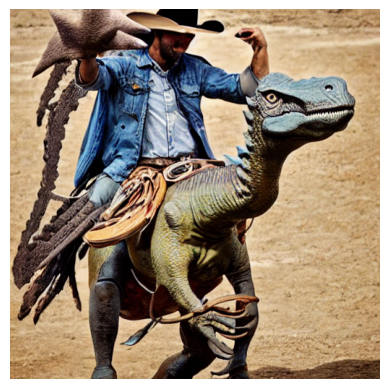

In [ ]:
# 런타임 4분 소요
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an cowboy man riding dinosaurs in pacaso style"

# 프롬프트로부터 이미지 생성
image = pipe(prompt,num_inference_steps=900).images[0]
plt.imshow(image)
plt.axis('off')
plt.show()
image.save("man_riding_dinosaurs.png")


# Image-to-Text

config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.47.1"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

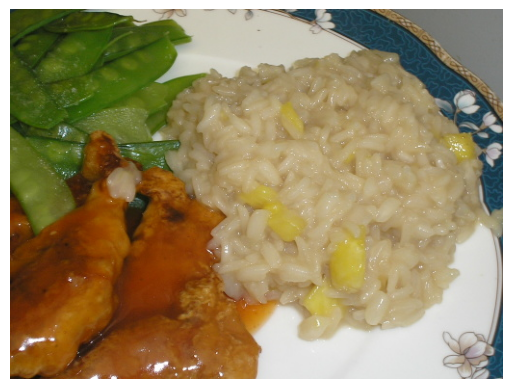

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


Predicted Caption: a white plate topped with rice and vegetables


In [ ]:
# 런타임 30초 소요
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# 사전 학습 모델 및 프로세서(processor) 불러오기
image_caption_model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
token_processor = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# 사용 가능한 디바이스 선택
execution_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image_caption_model.to(execution_device)

# 이미지 캡션 생성용 파라미터 설정
max_caption_length = 16
beam_search_width = 4
generation_parameters = {"max_length": max_caption_length, "num_beams": beam_search_width}

# 책에서는 지면상 아래 url이 여러 줄로 표기
image_url = 'https://raw.githubusercontent.com/bpbpublications/Building-Transformer-Models-with-PyTorch/main/chapter8_CVTask/food_image.jpg'

# URL에서 이미지 불러오기
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
if img.mode != "RGB":
    img = img.convert(mode="RGB")

# 이미지 출력
plt.imshow(img)
plt.axis('off')
plt.show()

# 이미지로부터 피처 추출
pixel_values = image_processor(images=[img], return_tensors="pt").pixel_values
pixel_values = pixel_values.to(execution_device)

# 모델을 사용해서 캡션 생성
generated_ids = image_caption_model.generate(pixel_values, **generation_parameters)

# 생성된 캡션을 디코딩
generated_captions = token_processor.batch_decode(generated_ids, skip_special_tokens=True)
generated_captions = [caption.strip() for caption in generated_captions]

# 생성된 캡션 출력
print(f"Predicted Caption: {generated_captions[0]}")


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.47.1"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

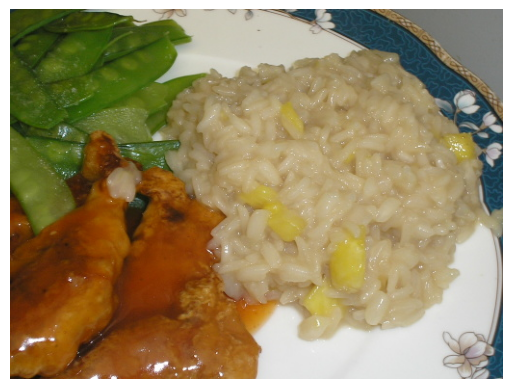

a plate of food with rice, beans, and vegetables 


In [ ]:
from transformers import pipeline

image_url = 'https://raw.githubusercontent.com/bpbpublications/Building-Transformer-Models-with-PyTorch/main/chapter8_CVTask/food_image.jpg'

image_to_text = pipeline("image-to-text",
                         model="nlpconnect/vit-gpt2-image-captioning")

output=image_to_text(image_url)

response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
if img.mode != "RGB":
    img = img.convert(mode="RGB")

# 이미지 출력
plt.imshow(img)
plt.axis('off')
plt.show()
print(output[0]['generated_text'])

# Image Question Answering


In [ ]:
# 런타임 1분 소요
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering

# 프로세스 및 모델 인스턴스화
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained(
    "Salesforce/blip-vqa-base").to("cuda")

# 책에서는 지면상 아래 url이 여러 줄로 표기
image_url = 'https://raw.githubusercontent.com/bpbpublications/Building-Transformer-Models-with-PyTorch/main/chapter8_CVTask/food_image.jpg'

# URL에 이미지를 요청(Request) 후 RGB로 변환
raw_image = Image.open(requests.get(image_url, stream=True).raw).convert('RGB')

# 물어볼 질의 내용
question = "Is there rice in the plate?"

# 입력을 모델에 맞게 준비
# 원본 이미지와 질의를 입력하고, 파이토치 텐서를 출력해 결과를 GPU로 전송
inputs = processor(raw_image, question, return_tensors="pt").to("cuda")

# 모델을 사용해 대답 생성
out = model.generate(**inputs)

# 위 출력에서 특수 토큰을 제외하고, 디코딩 작업 수행
answer = processor.decode(out[0], skip_special_tokens=True)

# 대답 출력
print(f"The answer to your question is :{answer}")


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

The answer to your question is :yes
